# **Boston House Price Prediction - Linear Regression**

-------------------------------
## **Objective**
-------------------------------

The the goal of this project is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries and overview of the dataset**

In [2]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [3]:
df = pd.read_csv("Boston.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:**

* The price of the house indicated by the variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).

### **Checking the info of the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics of this Dataset**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
* **CRIM:** Per capita crime rate by town
    * Around 75% of the crime rate falls between ~0-4 with a max of 88 suggesting a possible **outlier** 
* **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
    * Over 50% have 0% have residential land zoned for lots over 25,00sq.ft with the max 100%, suggesting this is **perhaps a rare commodity**.
* **INDUS:** Proportion of non-retail business acres per town
    * Ranges from 0.4-27% with an average of 11%, suggesting most towns have some industrial businesses.
* **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * With a mean of 0.069 only ~7% of houses bound the Charles River.
* **NOX:** Nitric Oxide concentration (parts per 10 million)
    * Ranges from 0.38-0.87 with a average of 0.55. Distribution looks nominal.
* **RM:** The average number of rooms per dwelling
    * Ranges from 3.5-8.7 with an average of 6.2. Distribution looks nominal.
* **AGE:** Proportion of owner-occupied units built before 1940
    * Ranges from 2.9-100y with an averaga of 68y. Distribution looks nominal.
    * **Min age of 2.9y indicates that no houses in the database are newly built**
* **DIS:** Weighted distances to five Boston employment centers
    * Ranges form 1.1-12.1 with an average of 3.7. Distribution looks nominal.
* **RAD:** Index of accessibility to radial highways
    * Ranges from 1-24 with over 75% being the max 24. 
    * There is a **large jump from the 50th percentile (5) and 75th percentile (24)**. Speculating that perhaps there are 2 cathegories of houses, those in rural areas and those more urban. 
* **TAX:** Full-value property-tax rate per 10,000 dollars
    * Ranges from 187-711 with and average of 408. Distribution looks nominal.
    * **That range suggests these are mid to high income houses.** 
* **PTRATIO:** Pupil-teacher ratio by town
    * Ranges from 12.6-22 with an avergage of 18.4. Distribution looks nominal.
* **LSTAT:** % lower status of the population
    * Ranges from 7-37.9% with an average of 12%. This indicates that most areas have little lower socio-economic class.
    * **The jump from 75th percentile (16.9%) to the max (37%) is indicative of a lower socio-economic area or less likely an outlier**
* **MEDV:** Median value of owner-occupied homes in 1000 dollars
    * Ranges from 5k-50k with an average of 22. Distribution looks nominal.

### **Univariate Analysis**

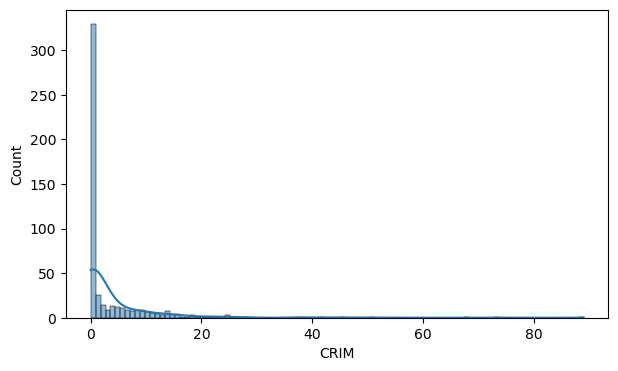

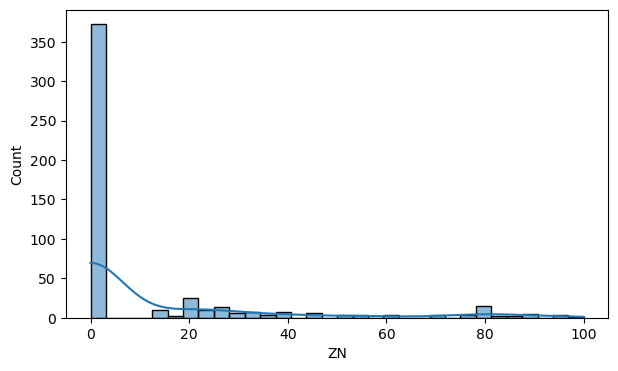

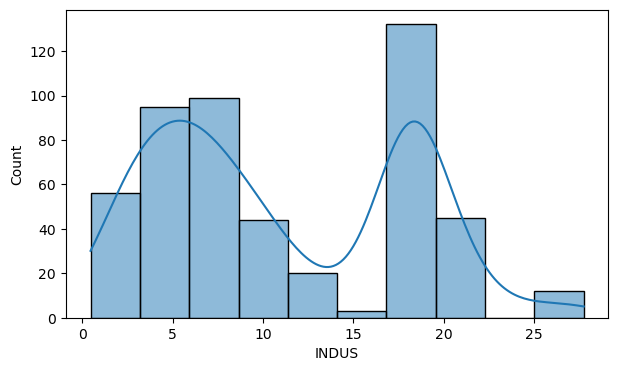

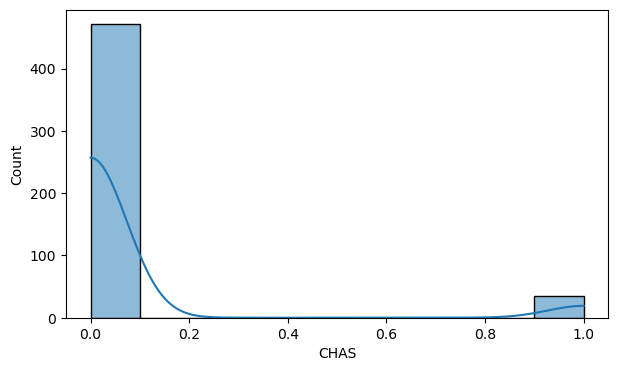

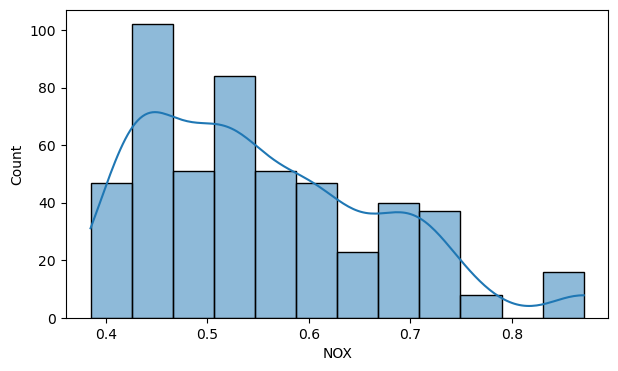

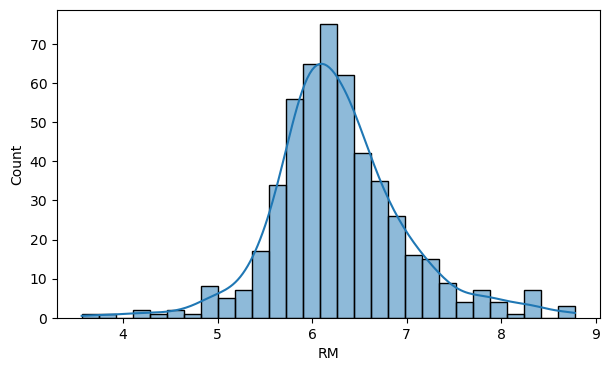

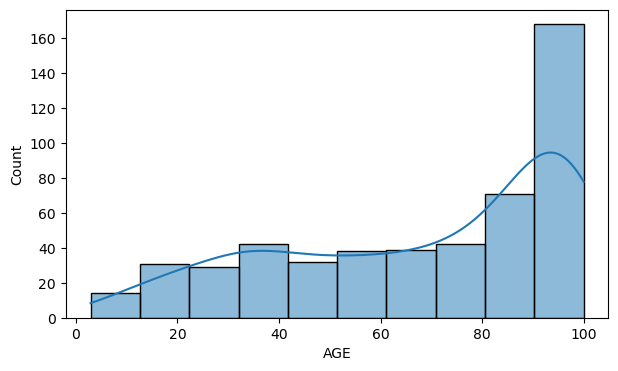

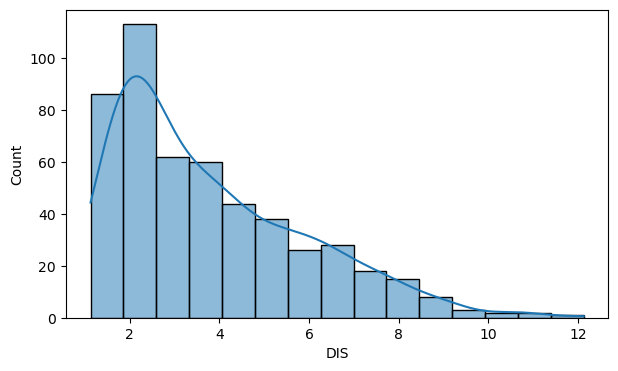

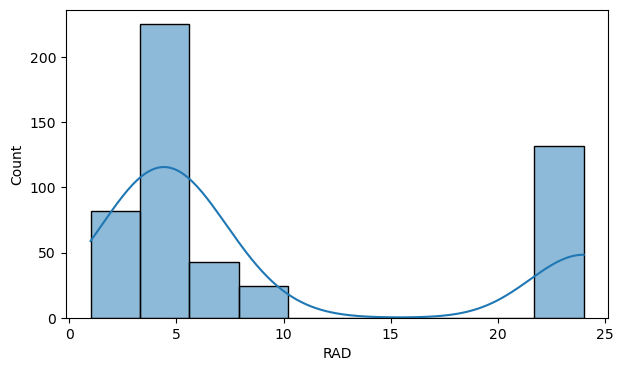

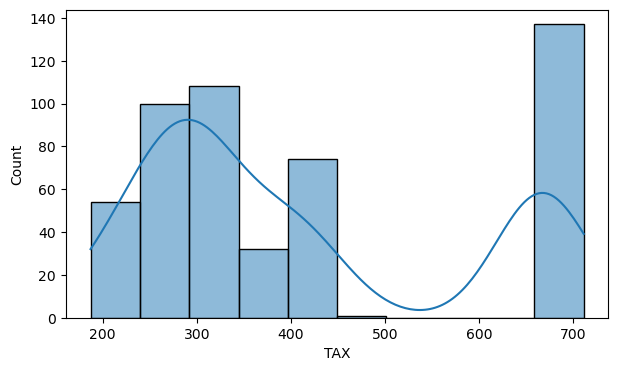

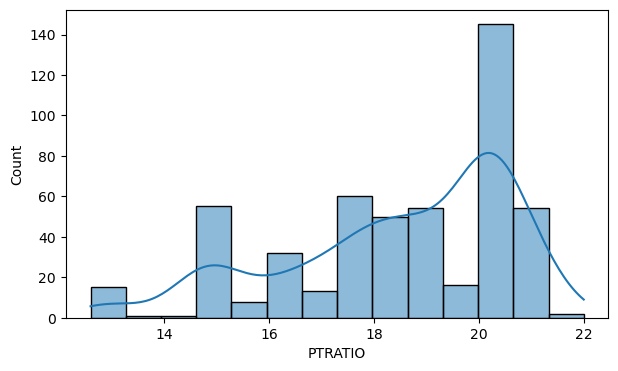

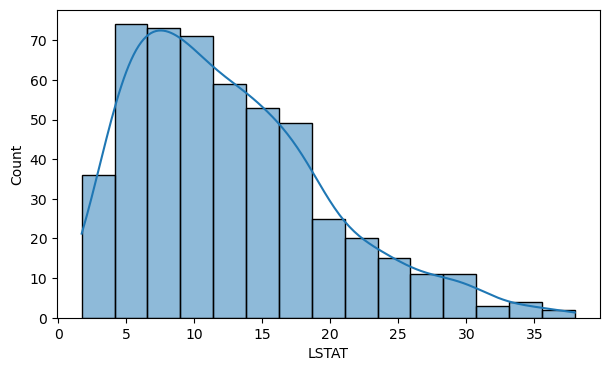

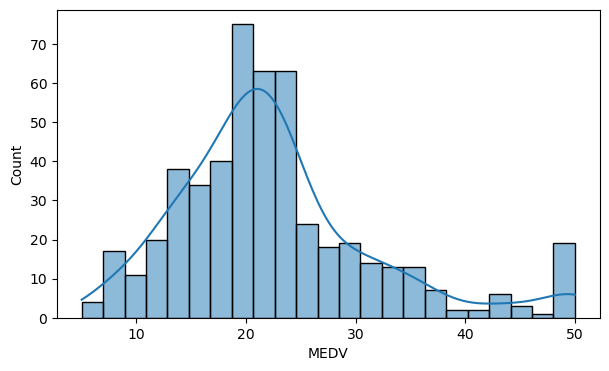

In [6]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

**Observations:**
* **CRIM:** Per capita crime rate by town
    * Heavily right skewed with most values being 0.
* **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
    * Most residential areas have 0 ZN, followed by a near uniform distribution from 10-100%
* **INDUS:** Proportion of non-retail business acres per town
    * Apears to be 2 peaks centered at 5% and 17%.
* **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * Very few houses tract river
* **NOX:** Nitric Oxide concentration (parts per 10 million)
    * Right skewed
* **RM:** The average number of rooms per dwelling
    * Reletively normal distribution around 6.2
* **AGE:** Proportion of owner-occupied units built before 1940
    * Heavily left-skewed, **suggesting most houses are older**
* **DIS:** Weighted distances to five Boston employment centers
    * Heavily right-skewed
* **RAD:** Index of accessibility to radial highways
    * Reiterrates our above observation, likelke **two cathegories of houses (rural and urban)**.
* **TAX:** Full-value property-tax rate per 10,000 dollars
    * Again looks like a similar representation to RAD of **two cathegories of houses (rural and urban)**.
* **PTRATIO:** Pupil-teacher ratio by town
    * Left-skewed
* **LSTAT:** % lower status of the population
    * Right-skewed suggesting there are fewer overall lower socio-economic people.
* **MEDV:** Median value of owner-occupied homes in 1000 dollars
    * Slightly skewed. **As this is our dependent variable will need to take action to normalize it**.

Least squares regression models assume the residuals are normal, and a non-normal dependent variable will produce non-normal residual errors. Therefore, as the dependent variable is sightly skewed, we need to apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

Note: Using methods like quantile regression and robust regression can use non-normal dependent variables.

In [5]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

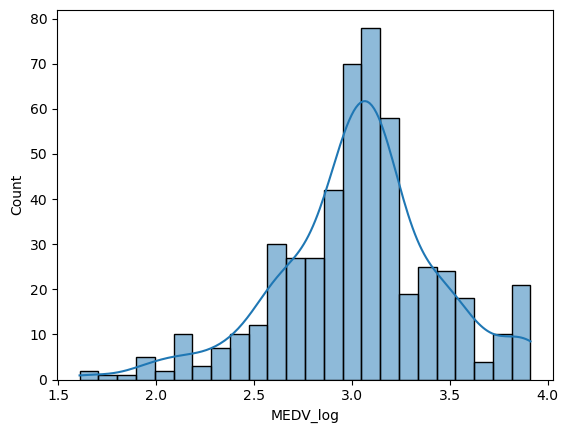

In [6]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

The log-transformation (**MEDV_log**) appears to have a **nearly normal distribution without skew**, therefore we can proceed.

### **Bivariate Analysis**

**Check the correlation using heatmap**

In [ ]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f',cmap = cmap, annot_kws={"size": 9, "rotation": 45})

plt.show()

**Observations:**

**Correlations involving dependent variable:**
* The highest possitive correlating feature for `MEDV_log` is `RM`(average number of rooms).
    * This makes sense as more rooms typically indicates a larger home
* The highest negative correlating feature for `MEDV_log` is `LSTAT`(% lower status of the population).
    * This makes sense as cities often have lower income areas. 
* It is note worthy that 8/12 of our features have negative correlations with `MEDV_log`, this means **most of them are measuring undesirable factors**.
---------------------
**Other strong correlations (>= 0.7 or <= -0.7) not involving our dependent variable:**
* Positive Correlation between `NOX` and `INDUS`, makes sense as more industrial areas would produces more Nitric Oxide
* Positive Correlation between `NOX` and `AGE`, perhaps indicating that the older areas are more industrialized?
* Neggative Correlation between `DIS` and `INDUS`, `DIS` and `NOX`, `DIS` and `AGE`. 
    * Distance to Boston employment centers seems to indicate a more modern area seperate from the older industrial areas that produce more nitric oxide.
* Positive Correlation between `TAX` and `INDUS`
* Very high Positive Correlation between `TAX` and `RAD`

#### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

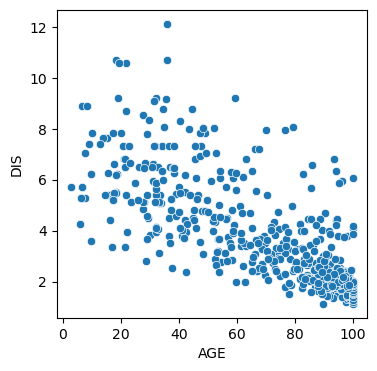

In [15]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (4, 4))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

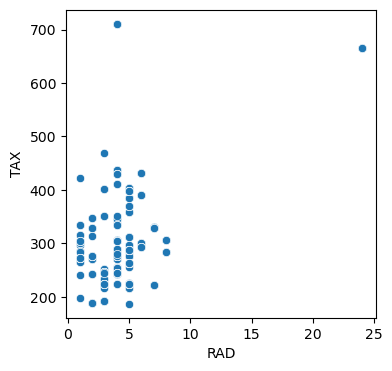

In [14]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (4, 4))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
- **The strong correlation might be due to outliers.**

Check the correlation remains after removing the outliers.

In [16]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

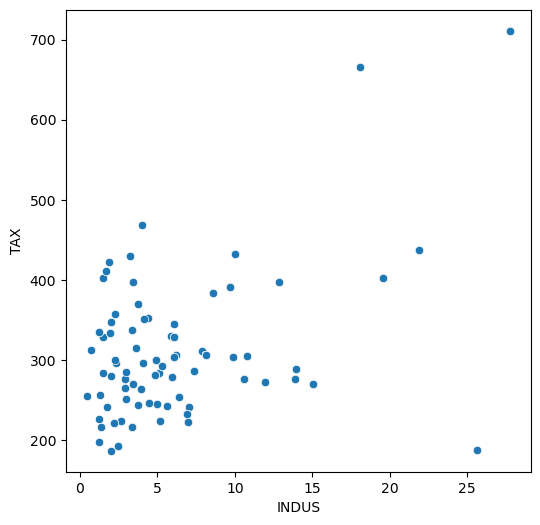

In [17]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

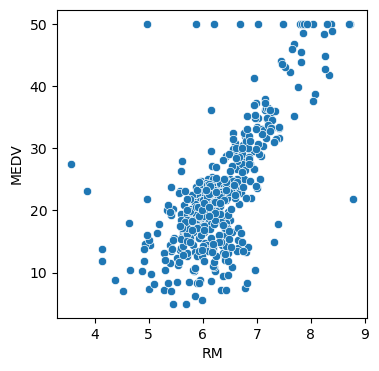

In [19]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (4, 4))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

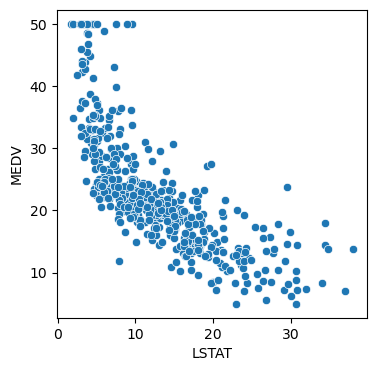

In [20]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (4, 4))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

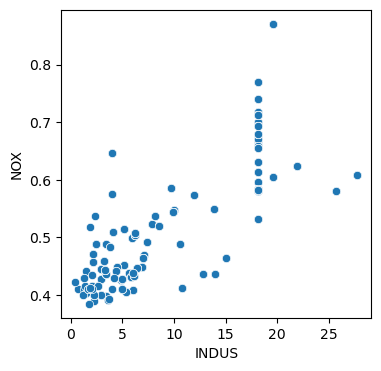

In [21]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (4, 4))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

**Observations:**
* Nitric Oxide does seem to increase with industrial areas
* No obviouse outliers present

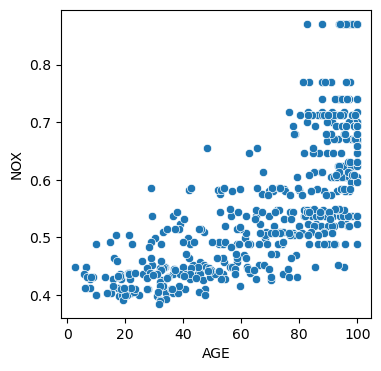

In [22]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (4, 4))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

**Observations:**
* Slight increase in Nitric Oxide with age of the house, againg giving credence to the theory that those are more industrial areas
* Posiblibly a group of highest NOX values being outliers. 

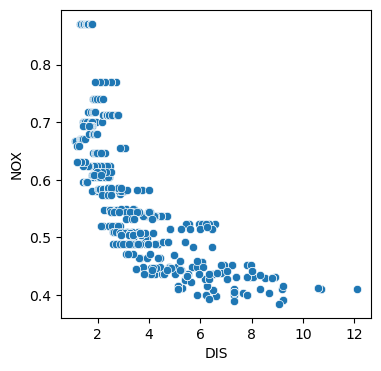

In [23]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (4, 4))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

**Observations:**
* Nitric Oxide strongly decreases with distance to employment centers. Possible that those centers are located in newer less industruse parts of Boston. 

LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant **relationships among few independent variables, which is not desirable for a linear regression model**. 

Let's first split the dataset.

## **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [24]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

**Intercept Term**

Allows the regression line to be shifted up or down on the y-axis to better fit the data. The value of the intercept term can be interpreted as the expected value of the dependent variable when all independent variables are set to zero. 


In [25]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

Using the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

#### Drop the column 'TAX' from the training data and check if multicollinearity is resolved.

In [21]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'TAX')

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

## **Model Building**

### **Linear Regression Model1**

In [22]:
# Create the model using ordinary least squared
model1 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          1.40e-101
Time:                        17:37:29   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**
* R-squared assesment is not bad at 76.9%, can be improved

#### **Examining the significance of the model variables**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

### **Model2 - Using significant variables**

In [23]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['ZN','AGE','INDUS'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.064e+28
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:37:29   Log-Likelihood:                 11011.
No. Observations:                 354   AIC:                        -2.200e+04
Df Residuals:                     342   BIC:                        -2.195e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.104e-15   1.72e-14      0.530      0.596   -2.47e-14    4.29e-14
CRIM       -1.431e-16   7.89e-17     -1.814      0.071   -2.98e-16     1.2e-17
CHAS        1.416e-15   1.52e-15      0.928      0.354   -1.58e-15    4.41e-15
NOX        -5.163e-15   6.96e-15     -0.741      0.459   -1.89e-14    8.53e-15
RM         -3.886e-16   8.42e-16     -0.462      0.645   -2.04e-15    1.27e-15
DIS         -1.11e-16    3.2e-16     -0.347      0.729   -7.41e-16    5.19e-16
RAD         3.123e-17    1.3e-16      0.241      0.810   -2.24e-16    2.86e-16
TAX        -2.602e-18   6.67e-18     -0.390      0.697   -1.57e-17    1.05e-17
PTRATIO    -3.053e-16    2.6e-16     -1.173      0.242   -8.17e-16    2.07e-16
LSTAT      -1.041e-17   1.08e-16     -0.097      0.923   -2.22e-16    2.02e-16
MEDV       -4.857e-17   1.86e-16     -0.261      0.795   -4.15e-16    3.18e-16
MEDV_log       1.0000   4.75e-15    2.1e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      141.725   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.558
Skew:                           1.661   Prob(JB):                    1.81e-145
Kurtosis:                       8.844   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, we will check the linear regression assumptions.

#### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

##### **1. Check for mean residuals**

In [24]:
residuals = model2.resid

np.mean(residuals)

7.338135121519608e-15

**Observations:**
* The mean residuals is very close to 0, therefore **the assumption is satisfied.**

##### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [25]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [26]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 12.474530449630052), ('p-value', 1.9164807503085753e-48)]

**Observations:**
* Since the p-value < 0.05, we reject the Null-Hypothesis hence residuals have heteroscedastic. 
* **Therefore the assumption is not satisfied and our model will overall be less accurate.**
* We can try and solve this by further transforming Y.

##### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

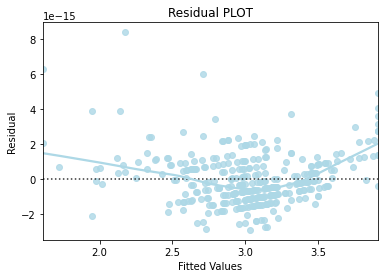

In [28]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**
* There is no pattern in the residual vs fitted values, therefore **the assumption is satesfied**.

##### **4. Normality of error terms**

The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

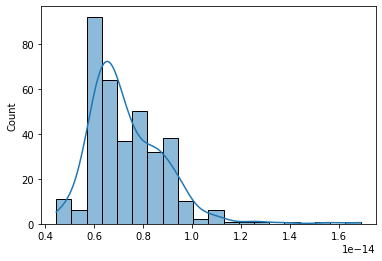

In [29]:
# Plot histogram of residuals

sns.histplot(residuals, kde = True)

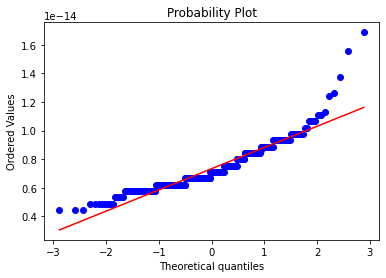

In [30]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**
* From the above plots, the residuals are skewed.
* **Therefore the assumption is not satisfied and our model will overall be less accurate.**

### **Check the performance of the model on the train and test data set**

In [69]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

## R2
from sklearn.metrics import r2_score


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data          RMSE           MAE          MAPE   r2
0  Train  7.504024e-15  7.338135e-15  2.509778e-13  1.0
1   Test  7.552803e-15  7.384444e-15  2.490217e-13  1.0


**Observations:**
* The train and test scores are very close, therefore our model **is not overfitted and generalizes well**.
* That the two scores are so close means there is likely little we can do to improve the model performance.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [32]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 1.000 (+/- 0.000)
Mean Squared Error: 0.000 (+/- 0.000)


**Observations**
* As predicted the model is already at peak performance and did not improve.

### Get model Coefficients 
Put model coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. (4 Marks)

**Hint:** To get values please use coef.values

In [66]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,9.103829e-15
1,CRIM,-1.431147e-16
2,CHAS,1.415534e-15
3,NOX,-5.162537e-15
4,RM,-3.885781e-16
5,DIS,-1.110223e-16
6,RAD,3.122502e-17
7,TAX,-2.602085e-18
8,PTRATIO,-3.053113e-16
9,LSTAT,-1.040834e-17


In [67]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( 9.103828801926284e-15 ) *  const + ( -1.4311468676808659e-16 ) *  CRIM + ( 1.4155343563970746e-15 ) *  CHAS + ( -5.162537064506978e-15 ) *  NOX + ( -3.885780586188048e-16 ) *  RM + ( -1.1102230246251565e-16 ) *  DIS + ( 3.122502256758253e-17 ) *  RAD + ( -2.6020852139652106e-18 ) *  TAX + ( -3.0531133177191805e-16 ) *  PTRATIO + ( -1.0408340855860843e-17 ) *  LSTAT + ( -4.85722573273506e-17 ) *  MEDV + ( 0.9999999999999991 ) *  MEDV_log + 

## **Conclusions and Business Recommendations**

### **Conclusions**

* We can use this forecasting model to predict the housing prices in Boston.
* The model explains 100% of the variation in the data with an r-squared of 1.
* The top 5 features that have the greatest impact on predicting housing prices are:
    * CRIM: Per capita crime rate by town - Where a lower crime rate results in a higher prices.
    * CHAS: Charles River dummy variable - Where being on the Charles River results in a higher prices.
    * NOX: Nitric Oxide concentration (parts per 10 million) - Where higher nitric oxide concentration results in higher prices
        * Note that NOX was heavily correlated to INDST and AGE which where dropped for that reason. Therefore it is likely that a higher NOX is acting as a stand in for the older and more industrial areas and that is key to increasing the price.
    * RM: The average number of rooms per dwelling - Where more rooms results in a higher price
    * DIS: Weighted distances to five Boston employment centers - Where a shorter distance to employment center results in higher prices. 
        * We observed that lower DIS is likely representative of more urban areas of Boston

### **Recommendations**

Our model can very accuratly predict the housing prices in Boston and would be a usefull tool in the real estate, banking, and insurance industries. 

From our model we where able to extract that value in Boston houses is primarily measured by:
* Areas with low crime rates
* Being on the bounds of the Charles River
* Older and more industrial neighboorhoods 
* Having more rooms
* Located near more urban areas